# S03 T01: Visualització gràfica d'un dataset
### Nivell 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

link_win = r'C:\Users\pacressa\Google Drive\Paul\Formacions\Numbers\CODING\BCN Activa - Data Science (Python)\Sprint 3. Visualitzacio de dades\S03T01\DelayedFlights.csv'
link_mac = '/Users/paullarripa/Desktop/Google Drive (Paul)/Paul/Formacions/Numbers/CODING/BCN Activa - Data Science (Python)/Sprint 3. Visualitzacio de dades/S03T01/DelayedFlights.csv'
link = link_win
#link = link_mac
df = pd.read_csv(link)
df['Date'] = df['Year'].astype(str) + "-" + df["Month"].astype(str) + "-" + df["DayofMonth"].astype(str)

df.replace('NA', np.nan, inplace=True)
df.replace('n/a', np.nan, inplace=True)
df.isna().sum()   #first look at NaN values and how often it's repeated

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
Date                      0
dtype: int64

In [3]:
df.dtypes #check about any strange data type

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                  object
dtype: object

In [4]:
#since there are a lot of NaNs we'll clean all rows with no delay data

df = df.dropna(axis="index", how="all", subset=['CarrierDelay','WeatherDelay',"NASDelay","SecurityDelay","LateAircraftDelay"])  
#the substed applies the dropna() only in the given list
#if we used (axis="columns", how="any") which is the default it would delete those COLUMN with ANY missing value
df = df.drop(columns="Unnamed: 0")   #drop this columns that doesn't bring any value

#changing the weekdays from number to string
weekday={7:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}  
df["DayOfWeek"] = df["DayOfWeek"].replace(weekday)

#moving the "Date" column to the front
shift = df.pop("Date")
df.insert(0, "Date", shift)

#deleting columns with all rows with the same value
nunique = df.nunique()
cols_to_drop = nunique[nunique==1].index
df.drop(cols_to_drop, axis=1)

df.head()

,Date,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008-1-3,2008,1,3,Thursday,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008-1-3,2008,1,3,Thursday,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,2008-1-3,2008,1,3,Thursday,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,2008-1-3,2008,1,3,Thursday,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,2008-1-3,2008,1,3,Thursday,1323.0,1255,1526.0,1510,WN,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


##### ------ Creating a smaller version of the dataframe, focusing only on relevant data:

In [5]:
df_XS = df.copy()
df_XS = df_XS.drop(columns= ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "FlightNum", "TailNum", 
                     "ActualElapsedTime", "CRSElapsedTime", "TaxiIn", "TaxiOut", "Cancelled", "CancellationCode", "Diverted"])
df_XS.head()

,Date,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008-1-3,2008,1,3,Thursday,WN,77.0,34.0,34.0,IND,BWI,515,2.0,0.0,0.0,0.0,32.0
5,2008-1-3,2008,1,3,Thursday,WN,230.0,57.0,67.0,IND,LAS,1591,10.0,0.0,0.0,0.0,47.0
7,2008-1-3,2008,1,3,Thursday,WN,107.0,80.0,94.0,IND,MCO,828,8.0,0.0,0.0,0.0,72.0
9,2008-1-3,2008,1,3,Thursday,WN,213.0,15.0,27.0,IND,PHX,1489,3.0,0.0,0.0,0.0,12.0
11,2008-1-3,2008,1,3,Thursday,WN,110.0,16.0,28.0,IND,TPA,838,0.0,0.0,0.0,0.0,16.0


## - Exercici 1
<b> Resumeix gràficament el data set DelayedFlights.csv
<br> Crea almenys una visualització per:
- Una variable categòrica (UniqueCarrier) 

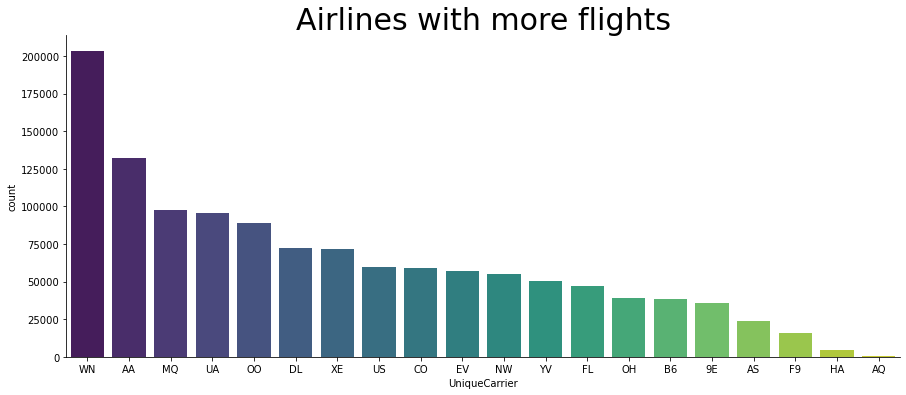

In [79]:
myorder = df_XS.groupby("UniqueCarrier").size().sort_values().index[::-1]             #order by value
sns.catplot(x="UniqueCarrier", kind="count", data=df_XS, aspect=2.5, order=myorder, palette='viridis')   
plt.title("Airlines with more flights", fontsize=30)

#save plot image in a png file
fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.savefig("S03T01_Ex1.1.png", bbox_inches='tight')
plt.show()

Looks like the top airline carriers in terms of number of flights in the database are WN (by far), AA, MQ and UA.

<b> - Una variable numèrica (ArrDelay)

C:\Users\pacressa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


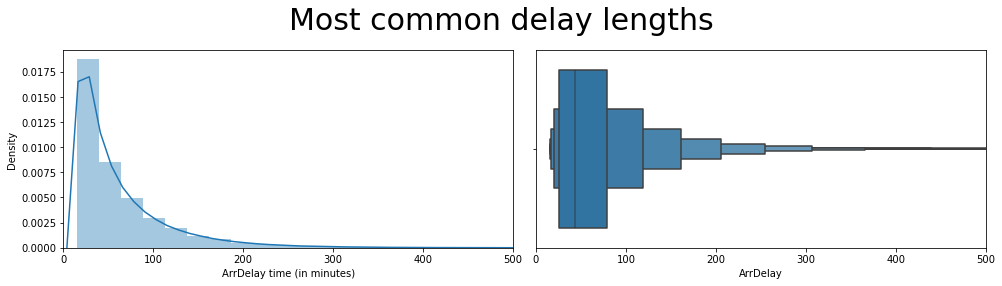

In [88]:
fig, axes = plt.subplots(1,2, figsize=[14,4])    #setting up 2 subplots we'll use
#plt.title("Hola", fontsize=30 , x=-1.5)

fig.suptitle("Most common delay lengths", fontsize=30)

p = sns.distplot(x=df_XS["ArrDelay"], bins=100, ax=axes[0])  #first subplot
p.set_xlim(0,500)                                              #constraining the plot for better visibility
p.set_xlabel("ArrDelay time (in minutes)")

o = sns.boxenplot(x=df_XS["ArrDelay"], ax=axes[1])          #second subplot
o.set_xlim(0,500)                                              #constraining the plot for better visibility

#save plot image in a png file
fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.savefig("S03T01_Ex1.2.png", bbox_inches='tight')
plt.show()

Apparently the most repeated ArrDelay times are gathered between 0 and 100 minutes.

<b> - Una variable numerica i una categorica (ArrDelay i UniqueCarrier):

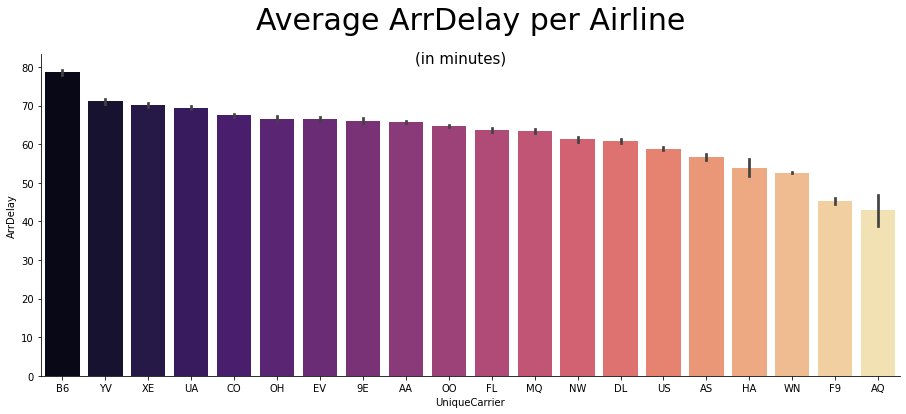

In [80]:
myorder = df_XS.groupby("UniqueCarrier").mean().sort_values(by="ArrDelay", ascending=False).index   #order by value
sns.catplot(x="UniqueCarrier", kind="bar", data=df_XS, y='ArrDelay', aspect=2.5, order=myorder, palette="magma")  

plt.title("Average ArrDelay per Airline", fontsize=30, pad="25.0")       #titol
plt.suptitle("(in minutes)", fontsize=15)                       #subtitol

fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.savefig("S03T01_Ex1.3.png", bbox_inches='tight')
plt.show()

We can assure that the airline with higher average delay at the arrival is B6 with approx. 77 minutes per delayed flight.

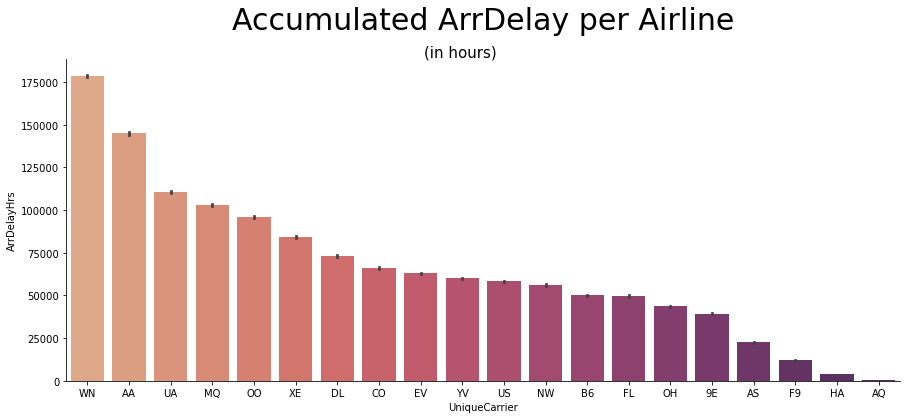

In [71]:
myorder = df_XS.groupby("UniqueCarrier").sum().sort_values(by="ArrDelay", ascending=False).index   #order by value

#aquest cop haurem de copiar el dataframe per crear una columna que passi ArrDelay de minuts a hores
hours = df_XS.copy()
hours["ArrDelayHrs"] = hours["ArrDelay"]/60

#mateix codi que abans per fer la plot, pero ara canviant el 'estimator' a 'np.sum' perque sumi els agregats
sns.catplot(x="UniqueCarrier", kind="bar", data=hours, y='ArrDelayHrs', aspect=2.5, order=myorder, palette="flare", 
            estimator=np.sum)  

#titol i subtitol
plt.title("Accumulated ArrDelay per Airline", fontsize=30, pad="30.0")
plt.suptitle("(in hours)", fontsize=15, y='1.01')

#save plot image in a png file
fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.savefig("S03T01_Ex1.4.png", bbox_inches='tight')
plt.show()

And on the other hand, we can conclude that the airline with more accumulated ArrDelay time is WN. The ranking looks pretty similar to the 'Airlines with more flights' plot. This is because every flight that's registered for each airline, counts approximately as 1 hour for that airline --> Parting from the average ArrDelay data, we know that the average delay time per flight (for any given airline) is 63 minutes:

In [10]:
df_XS['ArrDelay'].mean()

63.29120841242561

<b> - Dues variables numeriques (ArrDelay i DepDelay)

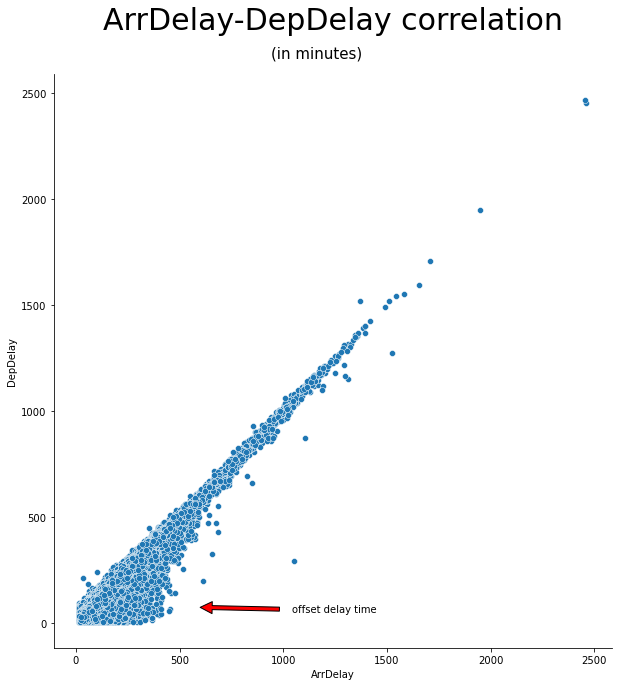

In [66]:
sns.relplot(kind="scatter", x="ArrDelay", y="DepDelay", data=df_XS, height=8.5)
plt.annotate("offset delay time", xy=(550,75), xytext=(1040,50), arrowprops=dict(facecolor='red', shrink=0.1))
plt.title("ArrDelay-DepDelay correlation", fontsize=30, pad="45.0")
plt.suptitle("(in minutes)", fontsize=15, y="1.03")

#save plot image in a png file
fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.savefig("S03T01_Ex1.5.png", bbox_inches='tight')
plt.show()

This plot helps us to spot the relation between the departure delay time of a flight considering how late arrived at the airport. In general terms there's a relation of 1:1 as the longer the ArrDelay the longer the DepDelay is. But there's a remarkable number of flights that despite being a delay on the arrival, the DepDelay is not of the same length. That could mean that in those flights the rest time in the airport has been shortened to offset the ArrDelay time. 

<b> - Tres variables (ArrDelay, DepDelay i UniqueCarrier)

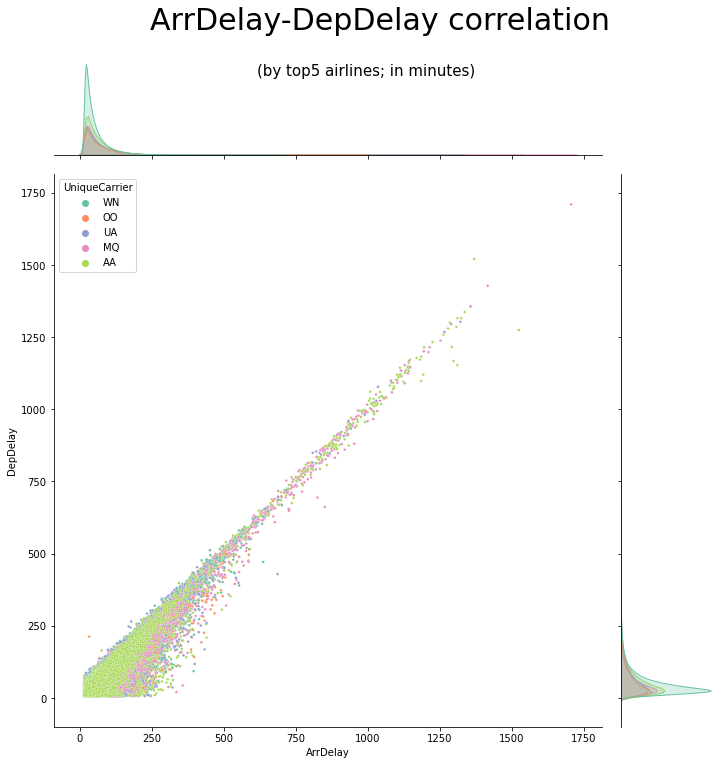

In [81]:
#sorting the Airlines by number of flights in the dataframe + keeping only the top5 for this plot
myorder = df_XS.groupby("UniqueCarrier").size().sort_values().index[::-1]          
x = df_XS["UniqueCarrier"].isin(myorder[:5])

x = sns.jointplot(kind="scatter", x="ArrDelay", y="DepDelay", data=df_XS[x], hue="UniqueCarrier", height=10, s=7, palette="Set2")
plt.title("ArrDelay-DepDelay correlation", fontsize=30, x=-2.55, y=1.25) #pad="145.0", loc='right')
plt.suptitle("(by top5 airlines; in minutes)", fontsize=15)

#save plot image in a png file
fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.savefig("S03T01_Ex1.6.png", bbox_inches='tight')
plt.show()

Thanks to this plot we can see that the top5 arilines in terms of number of flights share the same pattern discussed before.

<b> - Mes de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

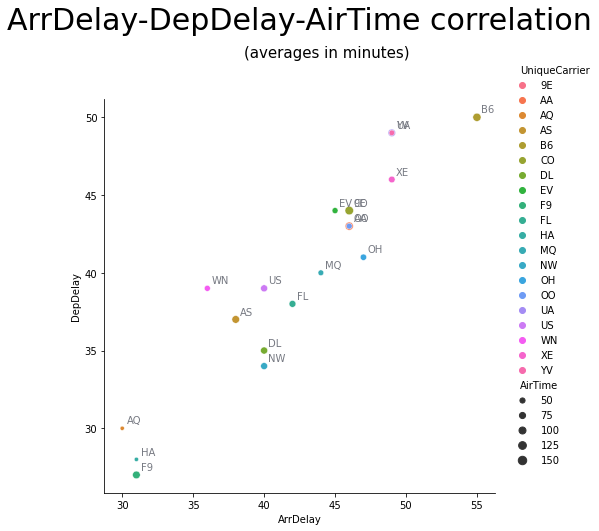

In [64]:
hours = df_XS.copy()

hours = hours.groupby("UniqueCarrier").aggregate(np.median)
#hours["AirTimeRange"] = hours.apply(lambda row: AirTimeRange(row), axis=1)    

#construction of the plot itself
sns.relplot(x="ArrDelay", y="DepDelay", data=hours, hue="UniqueCarrier", size="AirTime", height=6)
plt.title("ArrDelay-DepDelay-AirTime correlation", fontsize=30, pad="70.0")
plt.suptitle("(averages in minutes)", fontsize=15, y=1.1)

for x, y, z in zip(hours["ArrDelay"], hours["DepDelay"], hours.index):
    plt.text(x = x+0.3,     y = y+0.3,     s = z,   color='#757881') 

#save plot image in a png file
fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.savefig("S03T01_Ex1.7.png", bbox_inches='tight')
plt.show()

With this last plot we included the correlation between arrival delays, departure delays and air time, grouped by Airline. One conclusion we can draw is there's a 1:1 correlation between how late the airplane departs compared to how late it arrived. On the other hand, we can assess the ranking of airlines in terms of average delays, being B6 the highest and F9 the lowest. In the plot we can also see each airline avare time of flight, represented by the size of the marker. However, the 5 diferent sizes of marker are spread across the plot, meaning that there's no correlation between the length of the flight and its delay values.

## - Exercici 2
<b> Exporta els gràfics com imatges o com html.

In [14]:
# plt.savefig("S03T01_Ex1.7.png") added into all plots

## - Exercici 3
<b> Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

In [15]:
# resolved in the S02T05 exercise, which will be attached together with this file

In [16]:
# code to save the dataframe into an excel file
'''length = int(len(hours)/2)     
save_link = r'C:\Users\pacressa\Google Drive\Paul\Formacions\Numbers\CODING\BCN Activa - Data Science (Python)\Sprint 3. Visualitzacio de dades\S03T01\S03T01(2).xlsx'
with pd.ExcelWriter(save_link) as writer:              #save rankings_df to an Excel file, in two different sheets
    hours[:length].to_excel(writer, sheet_name="1")
    hours[length:].to_excel(writer, sheet_name="2")'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 48-49: truncated \UXXXXXXXX escape (<ipython-input-16-e9b6e566c2f2>, line 2)